In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import math 

# OPTIMISATION 
# COURSE-WORK
# Hongbin Zhang
# CID:00830004

# Part I 

###  First step: visualise the funciton              
$$\mathcal{v}(x,y)= 100 (y-x^2)^2 + (1 - x)^2 \tag{1}$$

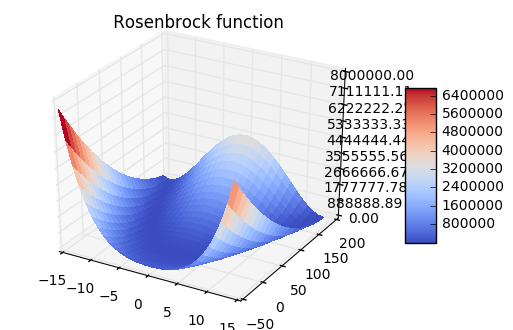

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-15, 15, 1)
Y = np.arange(-50, 200, 10)
X, Y = np.meshgrid(X, Y)
Z = 100*(Y-X**2)**2 + (1-X)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(' Rosenbrock function')
plt.show()


### A1) Compute analytically all stationary points of the function v(x,y) and verify if they are minima/maxima/saddle points.


Stationary points is where the first derivative equal to zero.
Hence we have $$ \triangledown v = (\frac{\partial v}{\partial x},\frac{\partial v}{\partial y})=0 $$
$$( 400x^3-400xy+2x-2, 200y-200x^2)= (0 , 0 ) \tag{2} $$
There is only one solution to equation 2 which is $ (1,1)$


The stationary point is minimum if its Hessian Matrix is positive definite at that point.             
The Hessian Matrix for equation 1 is: 
$$ H= 
\begin{bmatrix}
   \frac{\partial^2 v}{\partial x^2}   & \frac{\partial^2 v}{\partial x \partial y} \\
   \frac{\partial^2 v}{\partial x \partial y}  & \frac{\partial^2 v}{\partial y^2}\\
\end{bmatrix}
=
\begin{bmatrix}
1200x^2-400y+2 & -400x \\
-400x &  200 \\
\end{bmatrix} $$ 

substitude x=1 and y= 1 into equation 3, we will have 
$$ H(1,1)= 
\begin{bmatrix}
802 & -400 \\
-400 &  200 \\
\end{bmatrix}
$$

Hence, $$ x'Hx= 
\begin{bmatrix}
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
802 & -400 \\
-400 &  200 \\
\end{bmatrix}
\begin{bmatrix}
1 \\ 
1 \\
\end{bmatrix}
$$ 
$$ = 202 > 0 $$ 

The stationary point is at (1,1) , and it is a local minimium 

### A2) Plot (using Matlab or a similar SW) the level sets of the function v(x,y).

Level set are plotted as below. 
i.e. L(200000) is the set bounded by the contour 200000. 


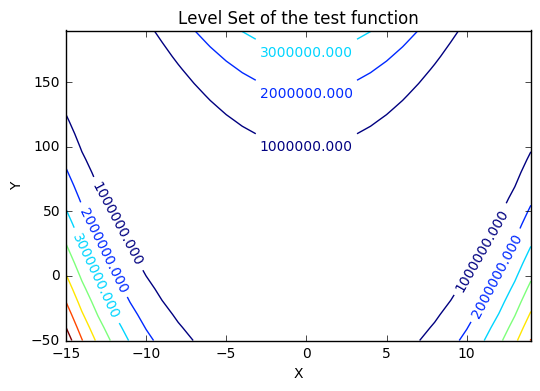

In [3]:
fig=plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Level Set of the test function')
plt.show()

## A3) Implement (in Matlab or a similar SW) procedures for the minimization of the function v(x,y) using the gradient method (see Section 2.5) with Armijo line search (see Section 2.4.2).


There are some basic settings , Including the function itself , gradient , Hessian and Armijo condition with $\gamma= 0.2, \sigma = 0.5, a =1$

In [64]:
def v(X):
    return 100*(X[1]-X[0]**2)**2 + (1-X[0])**2

def grad_v(X):
    return  np.array([400*X[0]**3-400*X[0]*X[1]+2*X[0]-2,200*X[1]-200*X[0]**2])

def Hessian(X):
    return np.array([[1200.*X[0]**2-400.*X[1]+2, -400*X[0]],[-400*X[0],200]])

def armijo(x_current,direction):
    gamma=0.2
    alpha=1
    while v(x_current+alpha*direction)-v(x_current)>gamma*alpha*np.dot(grad_v(x_current),direction):
        alpha=alpha * 0.5
    return alpha

tol= 10e-10

 #### Setting the initial X stars from point (-3/4, 1)
 Gradient Descent: 
     <img src='./image/Gradient algorithm.png'>

In [88]:
gradient_d_x=[]
x =np.array([-3./4., 1]) 
iteration=0
gradient_d_x.append(x)
while np.linalg.norm(grad_v(x))> tol:
    direction=-grad_v(x)
    x =x + armijo(x,direction)* direction
    iteration+=1
    gradient_d_x.append(x)

print 'The local minimum occurs at' ,x
print 'Mimimum value: ', v(x)
print 'No. of iterations:', iteration

The local minimum occurs at [ 1.  1.]
Mimimum value:  9.82760822228e-19
No. of iterations: 3362


## A4) Implement (in Matlab or a similar SW) procedures for the minimization of the function v(x,y) using Newton method (see Section 2.6) with Armijo line search.

Newton method: 
    <img src='./image/newton method.png'>

Newton method with Armijo line search. It is found that using Armijo line search will slow the convergence. The code and the result of not using Armijo can be found on Appendix.

In [89]:
newton_x=[]
x =np.array([-3./4., 1]) 
print 'Starting from:', x
iteration=0
newton_x.append(x)
while np.linalg.norm(grad_v(x))> tol:
    direction= -np.matmul(np.linalg.inv(Hessian(x)),grad_v(x))
    x =x + armijo(x,direction)* direction
    iteration+=1
    newton_x.append(x)
print 'The local minimum occurs at' ,x
print 'Mimimum value: ', v(x)
print 'No. of iterations:', iteration

Starting from: [-0.75  1.  ]
The local minimum occurs at [ 1.  1.]
Mimimum value:  4.93038065763e-30
No. of iterations: 20


## A5) Implement (in Matlab or a similar SW) procedures for the minimization of the functionv(x, y) using the Polak-Ribiere algorithm (see Section 2.7.3) with Armijo line search

Ploak - Ribiere algorithm : 
    <img src = './image/Polak-Ribiere algorithm.png'>

In [67]:
PR_x=[]
PR_x.append( np.array([-3./4.,1]))

print 'Starting from:', PR_x
iteration=0
direction = [] 
direction.append( - grad_v(PR_x[iteration]))
a = armijo(PR_x[iteration],direction[iteration])
PR_x.append(PR_x[iteration]+ a* direction[iteration])

while np.linalg.norm(grad_v(PR_x[iteration]))> tol:
    iteration +=1 
    direction.append( - grad_v(PR_x[iteration])+ direction[iteration-1]*np.dot(grad_v(PR_x[iteration]),
                               grad_v(PR_x[iteration])-grad_v(PR_x[iteration-1]))/ np.linalg.norm(grad_v(PR_x[iteration-1]))**2)
    a = armijo(PR_x[iteration],direction[iteration])
    PR_x.append(PR_x[iteration]+ a* direction[iteration])
print 'The local minimum occurs at' ,PR_x[-1]
print 'Mimimum value: ', v(PR_x[-1])
print 'No. of iterations:', iteration

Starting from: [array([-0.75,  1.  ])]
The local minimum occurs at [ 1.  1.]
Mimimum value:  3.91646647748e-21
No. of iterations: 67


## A6) Implement (in Matlab or a similar SW) procedures for the minimization of the function v(x,y) using the Broyden-Fletcher-Goldfarb-Shanno algorithm (see Section 2.8) with Armijo line search

<img src = './image/BFGS1 .png'>
<img src = './image/BFGS2.png'>

In [84]:
BFGS_x=[]
BFGS_x.append( np.array([-3./4,1]))

print 'Starting from:', x
iteration=0
H = [] 
H.append( 1.0* np.identity(len(BFGS_x[0])))
direction = [] 
direction.append(
    np.matmul(-H[iteration],grad_v(BFGS_x[iteration])))
a = armijo(BFGS_x[iteration],direction[iteration])
BFGS_x.append(BFGS_x[iteration]+ a* direction[iteration])
    
while np.linalg.norm(grad_v(BFGS_x[iteration]))> tol :
    iteration+=1
    gammaK = grad_v(BFGS_x[iteration])- grad_v(BFGS_x[iteration-1])
    deltK=BFGS_x[iteration]-BFGS_x[iteration-1]
    vk= np.sqrt(np.dot(np.matmul(gammaK, H[iteration-1]) ,gammaK )) * ( deltK/np.dot(gammaK,deltK) \
                -  np.matmul(H[iteration-1], gammaK)/np.dot (gammaK * H[iteration-1] , gammaK ) )
    H.append( H[iteration-1] + np.outer(deltK,deltK)/np.dot(deltK,gammaK)  \
-np.dot(np.matmul(H[iteration-1] , gammaK), gammaK) * H[iteration-1] / np.dot(np.matmul(gammaK, H[iteration-1]) ,gammaK )\
+ np.outer(vk , vk ) )
    direction.append (-np.matmul(H[iteration],grad_v(BFGS_x[iteration])))
    a = armijo(BFGS_x[iteration],direction[iteration])
    BFGS_x.append(BFGS_x[iteration]+ a* direction[iteration])
print 'The local minimum occurs at' ,BFGS_x[-1]
print 'Mimimum value: ', v(BFGS_x[-1])
print 'No. of iterations:', iteration
    

Starting from: [ 1.  1.]
The local minimum occurs at [ 1.  1.]
Mimimum value:  5.9279294892e-19
No. of iterations: 971


## A8) Run the minimization procedures written in points A3) to A7) with initial point (x0, y0) =(−3/4, 1).


####  A8a)  Plot, on the (x, y)-plane, the sequences of points generated by each algorithm. Arethese sequences converging to a stationary point of v(x, y)?


The seqence of points converges to a stationary point (1,1) as you can see the image below.

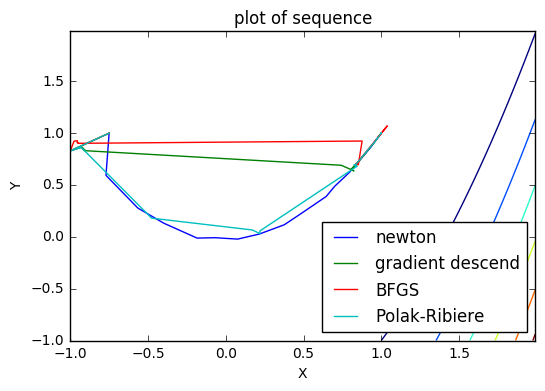

In [90]:
X = np.arange(-1, 2, 0.01)
Y = np.arange(-1, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 100*(Y-X**2)**2 + (1-X)**2

plt.figure()
plt.contour(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('plot of sequence')

def plot_sequence(X_location,method):
    x=[]
    y=[]
    for x1,y1 in X_location: 
        x.append(x1)
        y.append(y1)
    plt.plot(x,y,label=method)

plot_sequence(newton_x,'newton')
plot_sequence(gradient_d_x,'gradient descend')
plot_sequence(BFGS_x,'BFGS')
plot_sequence(PR_x,'Polak-Ribiere')

plt.legend(loc='best')
plt.show()



## A8b) For a sequence {xk, yk} consider the cost
$$ J_k = log ((x_k − 1)^2 + (y_k − 1)^2) $$

## Plot, for each of the sequences generated by the above algorithms, the cost Jk as a function of k. Use such a plot to assess the speed of convergence of each of the considered algorithms.

In [86]:
def cost_J(X_loction, method='a method ') : 
    J=[]
    for x,y in X_loction: 
        J.append(math.log((x-1)**2 + (y-1)**2)) 
    return J 

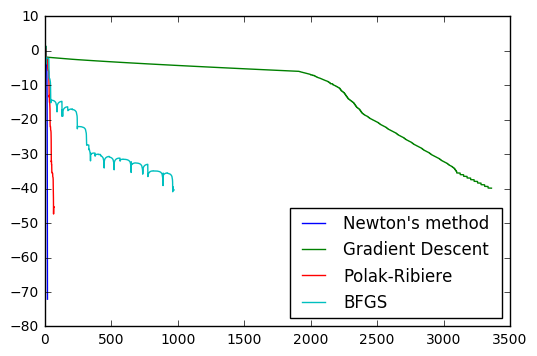

In [87]:
plt.plot( cost_J(newton_x),label='Newton\'s method ') 
plt.plot( cost_J(gradient_d_x),label='Gradient Descent') 
plt.plot( cost_J(PR_x),label='Polak-Ribiere') 
plt.plot( cost_J(BFGS_x),label='BFGS') 

plt.legend(loc= 'best')
plt.show()

# Part II


# Consider the constrained minimization problem
$$ \min_{x_1,x_2} = −x_1x_2 $$



$$ x_1 + x_2 − 2 = 0. $$ 


## B1) Write the necessary conditions of optimality and find all points satisfying such conditions.


No inequality constraints , so Langrangian Function becomes to $L(x,\lambda) = f(x)+ \lambda'g(x)$

I ignored the inequality constrained terms here. Necessary Conditions are： 
 $$\triangledown L(x^*,\lambda^*) = 0  $$
 $$g(x) =  x_1 + x_2 -2 =0 $$
 
 

where $ L(x,\lambda) = -x_1x_2 + \lambda (x_1+x_2 -2 ) $

Necessarty Conditions become
$$\frac {\partial L } {\partial x_1} = -x_2 + \lambda  =0 $$
$$\frac {\partial L } {\partial x_2} = -x_1 + \lambda =0 $$
$$\frac {\partial L } {\partial \lambda} = x_1 + x_2 -2 =0 \lambda $$

Solve above equations we get. 
$$x_1 = 1 $$
$$x_2 =1$$
$$ \lambda =1 $$ 

## B2) Check if the candidate optimal points obtained in B1) are constrained local minima.


Sufficient conditions are $$s'\triangledown ^2_{xx}L (x^*,\lambda^*,\rho^*) s  > 0   $$
where s is the solution for 
$$
\begin{bmatrix}
\frac{\partial g(x^*)}{\partial x}\\ \frac{\partial h_a(x^*)}{\partial x}   
\end{bmatrix} s = 0  $$ 

Hence, when $x^*= (1,1 ) $ 
, $$
\begin{bmatrix}
\frac{\partial g(x^*)}{\partial x}\\ \frac{\partial h_a(x^*)}{\partial x}   
\end{bmatrix}  = \begin{bmatrix}
1\\ 1   
\end{bmatrix}  $$

$$
\begin{bmatrix}
\frac{\partial g(x^*)}{\partial x}\\ \frac{\partial h_a(x^*)}{\partial x}   
\end{bmatrix} s = 0  $$ 
$$ s = \begin{bmatrix}
1\\-1
\end{bmatrix} $$


$$\triangledown ^2_{xx}L (x^*,\lambda^*,\rho^*)  $$



$$ = \begin{bmatrix}
\frac{\partial ^2 L(x^*)}{\partial x_1^2 }& \frac{\partial l(x^*)}{\partial x_2 \partial x_1}\\ 
 \frac{\partial l(x^*)}{\partial x_1 \partial x_2}& \frac{\partial ^2 g(x^*)}{\partial x_2 ^2 }
\end{bmatrix}
$$ 



$$ = \begin{bmatrix}
 0& -1\\ 
 -1& 0
\end{bmatrix} $$ 

$$s'\triangledown ^2_{xx}L (x^*,\lambda^*,\rho^*) s     $$

$$ = \begin{bmatrix}
1&  -1  
\end{bmatrix}  \times \begin{bmatrix}
 0& -1\\ 
 -1& 0
\end{bmatrix} \times \begin{bmatrix}
1\\-1  
\end{bmatrix} = 2 > 0 $$ 

## B3) By solving the equation of the constraint transform the considered constrained optimization problem into an unconstrained problem.


 constraint $$ x_1 + x_2 -2 =0  $$
 $$ \Rightarrow  x_1 = 2 - x_2  $$
 objective function become to 
 $$ \min_{x_1, x_2 } x_1x_2 $$
 $$ \Rightarrow  \min_{x_2} (2-x_2)\times x_2 $$
 $$ \Rightarrow  \min x_2 - x_2^2   $$

Solution for the above quadratic funcation is  $$ x_1 = 1  $$  $$    x_2 =1  $$ 

In [ ]:
X = np.arange(-1, 2, 0.01)
Y = np.arange(-1, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 100*(Y-X**2)**2 + (1-X)**2

plt.figure()
plt.contour(X, Y, Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('plot of sequence')

## B4) Construct the exact penalty function G(x) associated to the considered problem (see Section 3.4.3). Minimize analytically the function G(x) and show that the unconstrained minimum of G(x) is a solution of the considered constrained optimization problem.


$G(x)$ are defined as  
<img src ='./image/exact penalty.png'>

the matrix is singlar .... stuck here ....

## B5) Construct the exact augmented Lagrangian function S(x, λ) associated to the considered problem (see Section 3.4.4). Minimize analytically the function S(x, λ) and show that the unconstrained minimum of S(x, λ) yields a solution of the considered constrained optimization problem and the corresponding optimal multiplier.

 stuck again 

## Appendix 

Newton's method without Armijo provides a faster convergency. 

In [79]:
x =np.array([-3./4., 1]) 
print 'Starting from:', x
iteration=0
while np.linalg.norm(grad_v(x))> 0.000001:
    direction= -np.dot(np.linalg.inv(Hessian(x)),grad_v(x))
    x =x +  direction
    iteration+=1
print 'The local minimum occurs at' ,x
print 'Mimimum value: ', v(x)
print 'No. of iterations:', iteration

Starting from: [-0.75  1.  ]
The local minimum occurs at [ 1.  1.]
Mimimum value:  2.8778516095e-22
No. of iterations: 6
